In [7]:
import os
import time

import numpy as np
import scipy as sp
from scipy import sparse
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 18

import uproot

In [8]:
datasets = {
    "GamGam": {
        "Data": [
            "data_A.GamGam",
            "data_B.GamGam",
            "data_C.GamGam",
            "data_D.GamGam"
        ],
        "MC": [
            ("mc_341081.ttH125_gamgam.GamGam", {"tag": "tt"}),
            ("mc_343981.ggH125_gamgam.GamGam", {"tag": "gg"}),
            ("mc_345041.VBFH125_gamgam.GamGam", {"tag": "VBF"}),
            ("mc_345318.WpH125J_Wincl_gamgam.GamGam", {"tag": "Wp"}),
            ("mc_345319.ZH125J_Zincl_gamgam.GamGam", {"tag": "Z"})

        ]
    }
}

In [9]:
data_path = "root://eosuser.cern.ch//eos/user/a/ananiev/data/"
output_path = "/afs/cern.ch/user/a/ananiev/cernbox/output/"

In [10]:
features = pd.read_csv(os.path.join(output_path, "hgg_features.tsv"), sep="\t")
features.head()

,photon_n,photon_1lead_pt,photon_1lead_eta,photon_1lead_phi,photon_1lead_E,photon_1lead_etcone20,photon_2lead_pt,photon_2lead_eta,photon_2lead_phi,photon_2lead_E,...,lep_ptcone30_std,lep_etcone20_min,lep_etcone20_max,lep_etcone20_mean,lep_etcone20_sum,lep_etcone20_std,weight,met_et,met_phi,label
0,2,108118.750,1.054053,1.932582,173951.20,-464.99518,68904.586,0.885877,-2.737826,97757.080,...,NaN,inf,-inf,NaN,0.0,NaN,4.848383e-09,32510.855,-0.724335,Wp
1,2,70211.480,-0.197367,0.104515,71583.42,-231.95108,66904.695,0.508796,-1.859310,75753.060,...,NaN,inf,-inf,NaN,0.0,NaN,9.902610e-09,15634.184,1.559383,Wp
2,2,76359.230,-0.221558,1.503668,78241.07,-344.44138,29710.664,-1.773660,-1.037330,90054.370,...,NaN,inf,-inf,NaN,0.0,NaN,2.729051e-09,40178.410,-1.659941,Wp
3,2,96153.880,-1.658281,1.243575,261574.27,-86.92144,39025.430,-0.772355,-2.543020,51255.656,...,NaN,inf,-inf,NaN,0.0,NaN,0.000000e+00,86179.500,-2.024302,Wp
4,2,118062.484,-1.306239,3.044942,233946.62,-208.06148,32457.004,0.272842,-2.156659,33672.617,...,NaN,inf,-inf,NaN,0.0,NaN,4.493264e-09,23402.252,-2.056279,Wp


In [11]:
def total_nums(datasets, features):
    nums = {}
    
    counts = features["label"].value_counts()
    nums["after"] = dict(zip(counts.index.values, counts.values))
    
    nums["before"] = {}
    prefix = os.path.join(data_path, "GamGam/MC")
    for fname, meta in datasets["GamGam"]["MC"]:
        with uproot.open(os.path.join(prefix, f"{fname}.root")) as f:
            nums["before"][meta["tag"]] = f["mini"].numentries
    
    return pd.DataFrame(nums)
hgg_total_nums = total_nums(datasets, features)

None

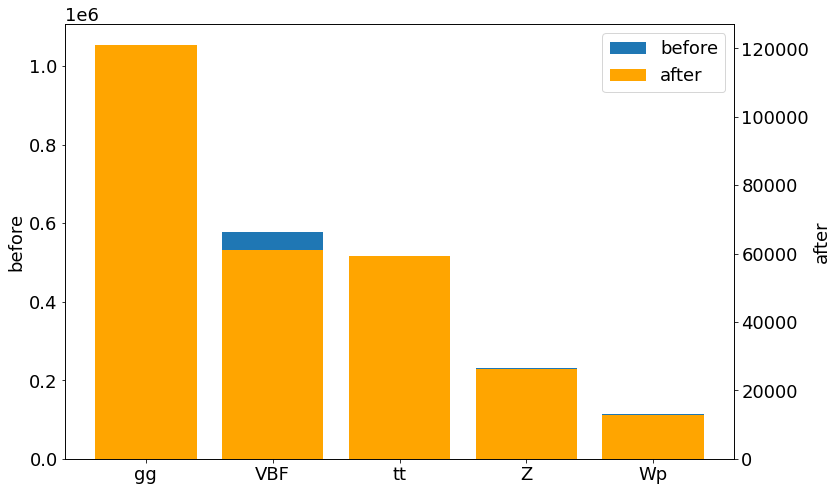

In [12]:
fig, ax = plt.subplots()
def plot_nums(ax, nums):
    befores = nums["before"].sort_values(ascending=False)
    afters = nums["after"].sort_values(ascending=False)
    lines = {}
    lines["before"] = ax.bar(befores.index.values, befores.values)
    ax.set_ylabel("before")
    ax1 = ax.twinx()
    lines["after"] = ax1.bar(afters.index.values, afters.values, color="orange")
    ax1.set_ylabel("after")
    ax.legend(lines.values(), lines.keys())
display(plot_nums(ax, hgg_total_nums))
fig.savefig("output/total_nums.png");

In [14]:
hgg_total_nums.sum()

after      280617
before    2473335
dtype: int64